In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import functions as f
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

/home/hatice/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/hatice/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [4]:
# better visualization of numbers
pd.options.display.float_format = '{:,.2f}'.format 

# DATA EXPLORATION AND DATA WRANGLING

In this project I analyzed 2 datasets:
- one contains information about 70,000 athletes who have participated in various Olympic Games. It includes details about their personal attributes, such as name, gender, age, height, and weight, as well as their team affiliation and the events they competed in. The dataset also records the specific games, including the year, season, and host city, along with the sport and event. Additionally, it notes the medals won by the athletes. 
- The second dataset consists of 230 entries that provide information on National Olympic Committees (NOCs) and their corresponding regions. It includes details about the regions associated with each NOC, with some entries containing additional notes.

I analyzed the participation of athletes in the Olympic Games over the years, visualizing the number of male and female participants. Additionally, I compared the total medals won by male and female athletes. I also examined the age distribution of the athletes and identified the countries and athletes with the most medals. Furthermore, I analyzed the top 10 sports with the highest number of participants.

In [5]:
olympic_df = pd.read_csv('dataset_olympic_data/dataset_olympics.csv')
noc_region_df = pd.read_csv('dataset_olympic_data/noc_region.csv')

## EXPLORING THE DATASET

In [6]:
noc_region_df

,noc_region,reg,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [7]:
noc_region_df['notes'].unique()


array([nan, 'Netherlands Antilles', 'Antigua and Barbuda', 'Australasia',
       'Bohemia', 'Crete', 'Hong Kong', 'Individual Olympic Athletes',
       'Virgin Islands', 'North Borneo', 'Newfoundland',
       'Refugee Olympic Team', 'Serbia and Montenegro',
       'Turks and Caicos Islands', 'Trinidad and Tobago', 'Tuvalu',
       'United Arab Republic', 'Unknown', 'West Indies Federation',
       'North Yemen', 'South Yemen', 'Yugoslavia'], dtype=object)

In [8]:
olympic_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [9]:
# olympic_df.tail()

In [10]:
olympic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [11]:
olympic_df.describe()

,ID,Age,Height,Weight,Year
count,"70,000.00","67,268.00","53,746.00","52,899.00","70,000.00"
mean,"18,081.85",25.64,175.51,70.90,"1,977.77"
std,"10,235.61",6.49,10.38,14.22,30.10
min,1.00,11.00,127.00,25.00,"1,896.00"
25%,"9,325.75",21.00,168.00,61.00,"1,960.00"
50%,"18,032.00",25.00,175.00,70.00,"1,984.00"
75%,"26,978.00",28.00,183.00,79.00,"2,002.00"
max,"35,658.00",88.00,223.00,214.00,"2,016.00"


In [12]:
olympic_df.isna().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

In [13]:
olympic_df['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [14]:
olympic_df.nunique()

ID        35658
Name      35556
Sex           2
Age          68
Height       87
Weight      173
Team        827
NOC         226
Games        51
Year         35
Season        2
City         42
Sport        65
Event       744
Medal         3
dtype: int64

In [15]:
medal_mask = ['Gold', 'Silver', 'Bronze']
olympic_df['Medal'].value_counts()[medal_mask] 

Medal
Gold      3292
Silver    3190
Bronze    3208
Name: count, dtype: int64

### Histogram

From the histogram below we can see that:

- The majority of the athletes age is between ~18 and ~25
- Most athletes are between 160cm and 190cm 
- Most athletes weigh between 50 and 100 and the peak is  around 175
- Participation to the olympic games has increased over time. 

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Year'}>]], dtype=object)

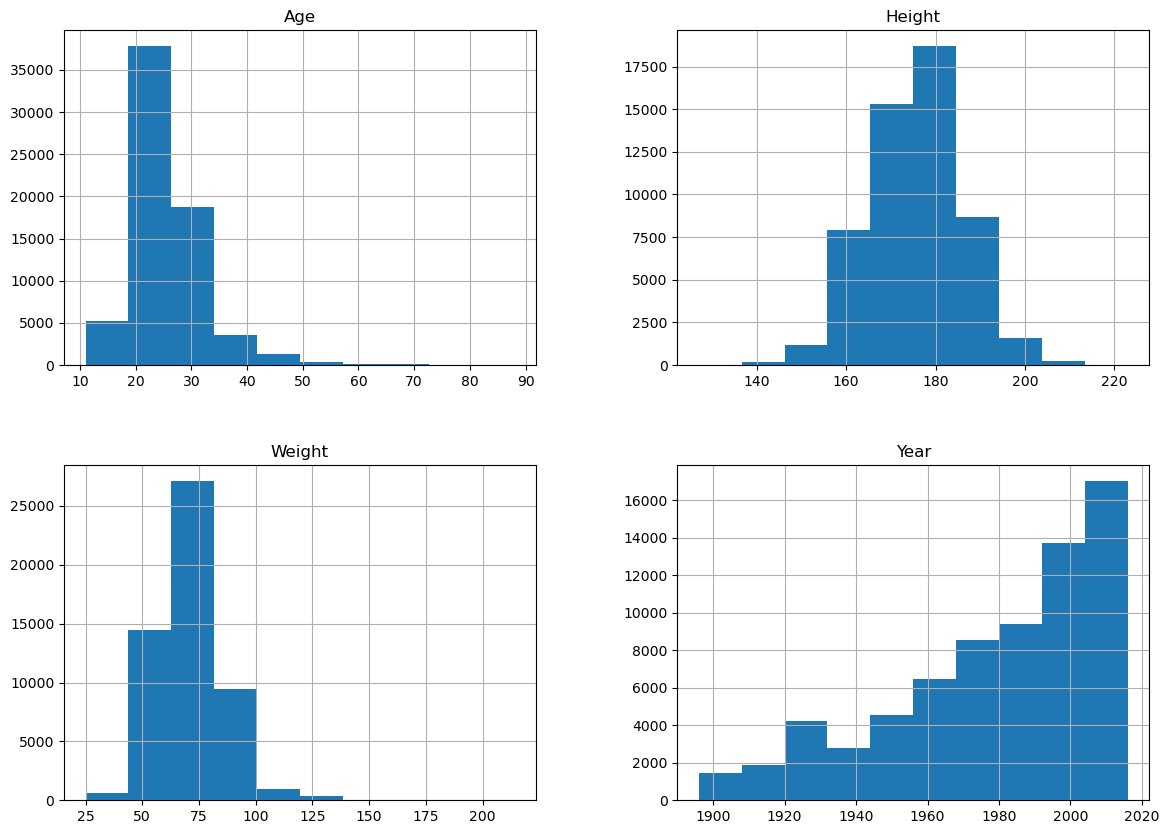

In [16]:
olympic_df.drop(columns='ID').hist(figsize=(14,10))

### Merge NOC dataset with Olympic dataset



For convenience, I merged the two datasets. Although the *noc_region.csv* file does not contain information directly useful for future analysis, I included the region column to easily identify the corresponding country for each NOC code.<br>
Additionally, I renamed the *noc_region* column to NOC to facilitate merging the datasets on this common column.<br>
In the *noc_region.csv* file, there is a column named notes that provides additional information about countries. However, this information is not relevant to our analysis, and the column contains many missing values that we cannot fill. Therefore, I will drop the notes column from dataset. 



#### Clean NOC dataset

In [17]:
noc_region_df[noc_region_df['reg'].isnull()]

,noc_region,reg,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


In [18]:
noc_region_df.rename(columns={'noc_region' : 'NOC'}, inplace=True)

In [19]:
olympic_df = olympic_df.merge(noc_region_df, on='NOC')

In [20]:
olympic_df['notes'].unique()

array([nan, 'United Arab Republic', 'North Yemen', 'Virgin Islands',
       'Turks and Caicos Islands', 'Trinidad and Tobago',
       'Netherlands Antilles', 'South Yemen', 'Australasia',
       'Serbia and Montenegro', 'Individual Olympic Athletes',
       'Yugoslavia', 'Refugee Olympic Team', 'Crete',
       'Antigua and Barbuda', 'Hong Kong', 'Bohemia',
       'West Indies Federation', 'North Borneo', 'Unknown', 'Tuvalu'],
      dtype=object)

Drop notes column. 

In [21]:
olympic_df = olympic_df.drop(columns=['notes'])

In [22]:
olympic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69945 entries, 0 to 69944
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      69945 non-null  int64  
 1   Name    69945 non-null  object 
 2   Sex     69945 non-null  object 
 3   Age     67215 non-null  float64
 4   Height  53706 non-null  float64
 5   Weight  52858 non-null  float64
 6   Team    69945 non-null  object 
 7   NOC     69945 non-null  object 
 8   Games   69945 non-null  object 
 9   Year    69945 non-null  int64  
 10  Season  69945 non-null  object 
 11  City    69945 non-null  object 
 12  Sport   69945 non-null  object 
 13  Event   69945 non-null  object 
 14  Medal   9687 non-null   object 
 15  reg     69937 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 8.5+ MB


## DATA CLEANING, HANDLING MISSING VALUES

After merging the datasets, I will now work with *dataset_olympics.csv*, which I called *olympic_df*.<br>
First, I checked for and removed any duplicate values. <br>
Before modifying the *medal* column, I created a binary column called *Athlete_won_medal*. This column will be used in the prediction model I will develop later. It contains '1' if the athlete won a medal (regardless of whether it is Gold, Silver, or Bronze) and '0' if the athlete did not win a medal. In the *medal* column NaN values indicate that the athlete did not win a medal, so I will replace these NaN values with the string "No medal" using pandas' fillna() method.<br>
Additionally, I dropped rows with NaN values in the *region* column, as it is unclear which country or region they belong to.

### Check and clean duplicates:

In [23]:
print('There are {} duplicate rows in olympic_df based on all columns.'.format(olympic_df.duplicated().sum()))

There are 383 duplicate rows in olympic_df based on all columns.


In [24]:
olympic_df.drop_duplicates(keep='first', inplace=True)

In [25]:
print('There are {} duplicate rows in olympic_df based on all columns.'.format(olympic_df.duplicated().sum()))

There are 0 duplicate rows in olympic_df based on all columns.


### Missing Values

Percentage of missing data:

In [26]:
# missing_percentage = ((olympic_df.isnull().sum())/len(olympic_df))*100
# missing_data = pd.DataFrame({'Missing Values': olympic_df.isnull().sum(), 'Percentage': missing_percentage})
# print(missing_data)

**Medal column cleaning**

In [27]:
olympic_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,reg
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69940,35656,Stuart Fitzsimmons,M,19.00,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN,UK
69941,35656,Stuart Fitzsimmons,M,19.00,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Slalom,NaN,UK
69942,35657,"David Thomas ""Dave"" Fitzsimons",M,26.00,170.00,65.00,Australia,AUS,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Men's 10,000 metres",NaN,Australia
69943,35657,"David Thomas ""Dave"" Fitzsimons",M,30.00,170.00,65.00,Australia,AUS,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",NaN,Australia


In [28]:
#  creating a binary column to indicate if  athlete won medal or not: 1 -> won; 0->didn't won
olympic_df['Athlete Won Medal'] = olympic_df['Medal'].notnull().astype(int)

In [29]:
olympic_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,reg,Athlete Won Medal
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,0
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,0
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,0
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,1
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69940,35656,Stuart Fitzsimmons,M,19.00,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN,UK,0
69941,35656,Stuart Fitzsimmons,M,19.00,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Slalom,NaN,UK,0
69942,35657,"David Thomas ""Dave"" Fitzsimons",M,26.00,170.00,65.00,Australia,AUS,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Men's 10,000 metres",NaN,Australia,0
69943,35657,"David Thomas ""Dave"" Fitzsimons",M,30.00,170.00,65.00,Australia,AUS,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",NaN,Australia,0


In [30]:
olympic_df['Medal'] = olympic_df['Medal'].fillna(value='No medal')

In [31]:
olympic_df.isnull().sum()

ID                       0
Name                     0
Sex                      0
Age                   2669
Height               15861
Weight               16704
Team                     0
NOC                      0
Games                    0
Year                     0
Season                   0
City                     0
Sport                    0
Event                    0
Medal                    0
reg                      8
Athlete Won Medal        0
dtype: int64

In [32]:
noc_region_df

,NOC,reg,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [33]:
noc_region_df[noc_region_df['NOC']=='ROT']

,NOC,reg,notes
168,ROT,NaN,Refugee Olympic Team


In [34]:
olympic_df.isnull().sum()

ID                       0
Name                     0
Sex                      0
Age                   2669
Height               15861
Weight               16704
Team                     0
NOC                      0
Games                    0
Year                     0
Season                   0
City                     0
Sport                    0
Event                    0
Medal                    0
reg                      8
Athlete Won Medal        0
dtype: int64

In [35]:
olympic_df[olympic_df['reg'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,reg,Athlete Won Medal
6264,3515,Paulo Amotun Lokoro,M,24.00,170.00,61.00,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",No medal,NaN,0
7896,4379,Rami Anis,M,25.00,178.00,78.00,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,No medal,NaN,0
7897,4379,Rami Anis,M,25.00,178.00,78.00,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,No medal,NaN,0
21517,11364,Yiech Pur Biel,M,21.00,178.00,62.00,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 800 metres,No medal,NaN,0
31692,16287,Mabika Yolande Bukasa,F,28.00,170.00,70.00,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Women's Middleweight,No medal,NaN,0
40201,20693,James Nyang Chiengjiek,M,24.00,179.00,59.00,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres,No medal,NaN,0
61032,31292,Fritz Eccard,M,NaN,NaN,NaN,Unknown,UNK,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,No medal,NaN,0
64626,33094,Logona Esau,M,21.00,163.00,69.00,Tuvalu,TUV,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Men's Lightweight,No medal,NaN,0


**Drop rows with nan values in region** 

In [36]:
olympic_df.dropna(subset=['reg'], inplace=True)

In [37]:
olympic_df[olympic_df['reg'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,reg,Athlete Won Medal


**Filling  missing values with random forest**

After cleaning the dataset, I filled the missing values using a Random Forest Regressor.

***Random Forest Regressor:***

A Random Forest Regressor is an ensemble learning method that combines multiple decision trees to make predictions. Each decision tree in the forest is trained on a random subset of the data, and the final prediction is obtained by averaging the predictions of all the individual trees. This approach helps improve the accuracy and robustness of the model by reducing the risk of overfitting and capturing complex patterns in the data.

In [38]:
for column in olympic_df.columns:
    if olympic_df[column].isna().any():
        olympic_df = f.impute_missing_values_with_random_forest(olympic_df, column)
        

In [39]:
olympic_df.isnull().sum()

ID                   0
Name                 0
Sex                  0
Age                  0
Height               0
Weight               0
Team                 0
NOC                  0
Games                0
Year                 0
Season               0
City                 0
Sport                0
Event                0
Medal                0
reg                  0
Athlete Won Medal    0
dtype: int64

## PLOTS

### PARTICIPATION OF MALE AND FEMALE  ATHLETES  IN THE OLYMPIC GAMES OVER THE YEARS 

It is evident that women's involvement was minimal before the 1970s, with a significant increase starting in the 1980s. The data shows that while male athletes consistently had higher participation rates, the gap between male and female athletes has been narrowing steadily in recent decades.



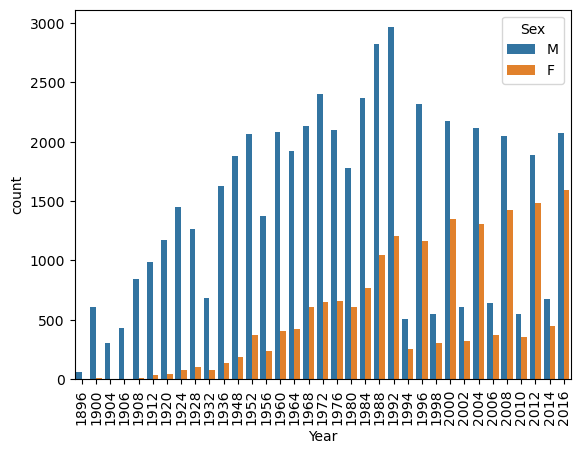

In [40]:
sns.countplot(olympic_df, x="Year", hue='Sex')
plt.xticks(rotation = 90)
plt.show()

### Distribution of the medals over gender and age

We see that in total men got more medals then women, is due to high quantity of men participation to the olympic games. 

In [41]:
no_medal_mask= olympic_df[olympic_df['Medal']!='No medal']

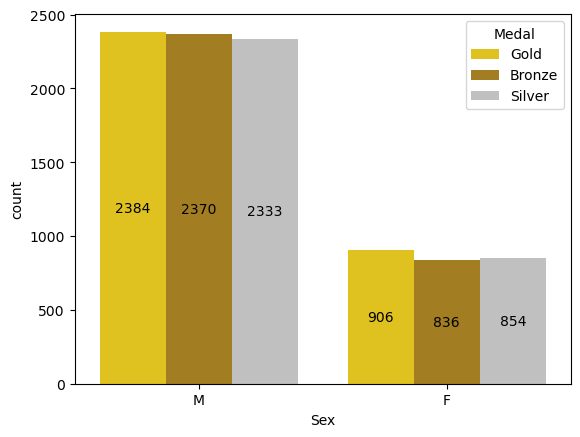

In [42]:
colors = ['gold', 'darkgoldenrod', 'silver']

ax = sns.countplot(no_medal_mask, x="Sex", hue='Medal', palette=colors)
for container in ax.containers:
    ax.bar_label(container, label_type='center', rotation=0, fontsize=10)

plt.show()

### Same visualizations for after 1980

In [43]:
no_medal_mask = olympic_df[olympic_df['Medal']!='No medal']
df_after_1980 = no_medal_mask[no_medal_mask['Year']>1980].copy()

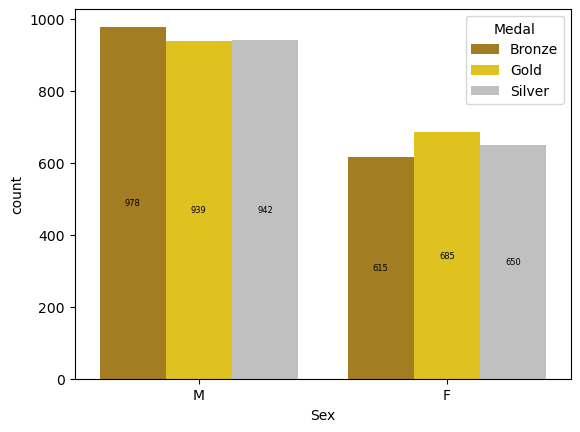

In [44]:
colors = [ 'darkgoldenrod', 'gold','silver']
ax = sns.countplot(df_after_1980, x="Sex", hue='Medal', palette=colors)
for container in ax.containers:
    ax.bar_label(container, label_type='center', rotation=0, fontsize=6)

plt.show()

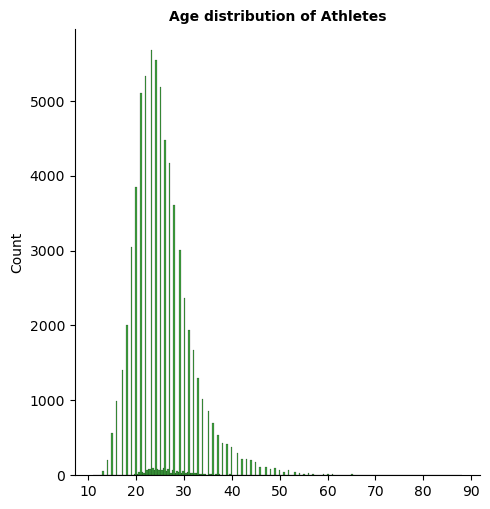

In [45]:
x = sns.displot(olympic_df['Age'].values, color='green')
plt.title('Age distribution of Athletes', fontsize=10, fontweight='bold')
plt.show()

### Total medals gained by each country and visualization of top 10 team with most medals

From the table, we can see that the United States leads with the highest number of total medals (1561) and the highest proportion of medals won (0.58). This indicates a high success rate for American athletes. Even if Italy has fewer medals than France, it has a slightly higher proportion (0.31) compared to France (0.27), suggesting that Italy had a more efficient medal-winning performance relative to the number of athletes.

Great Britain, Germany, Australia, Sweden, and Canada also have notable performances, with varying proportions of medals won. Germany, for instance, has a proportion of 0.44, which is relatively high compared to its total number of athletes (982).

In [46]:
medal_count = olympic_df.groupby(['NOC','Medal']).size().unstack(fill_value=0).reset_index()
medal_count['Total'] = medal_count[['Gold', 'Silver', 'Bronze']].sum(axis=1)
# medal_count

ten_team_with_most_medals = medal_count.sort_values(by=['Total'], ascending=False).head(10)
ten_team_with_most_medals

team_medal_count = olympic_df.groupby(['NOC', 'Medal']).size()
team_medal_count
team_athlete_count = olympic_df.groupby('NOC')['ID'].nunique().sort_values(ascending=False).head(10)
team_athlete_count = team_athlete_count.reset_index()

team_athlete_count.columns = ['NOC', 'Total Athletes']

ten_team_with_most_medals = ten_team_with_most_medals.merge(team_athlete_count, on="NOC")

ten_team_with_most_medals['Proportion'] = ten_team_with_most_medals['Total']/ten_team_with_most_medals['Total Athletes']
ten_team_with_most_medals

,NOC,Bronze,Gold,No medal,Silver,Total,Total Athletes,Proportion
0,USA,366,747,3572,448,1561,2704,0.58
1,FRA,257,184,4169,216,657,2401,0.27
2,ITA,194,217,3559,193,604,1930,0.31
3,GBR,186,210,2888,207,603,1865,0.32
4,GER,144,148,1607,142,434,982,0.44
5,AUS,151,98,1897,124,373,1152,0.32
6,SWE,145,84,1761,136,365,1000,0.36
7,CAN,127,119,2302,114,360,1341,0.27


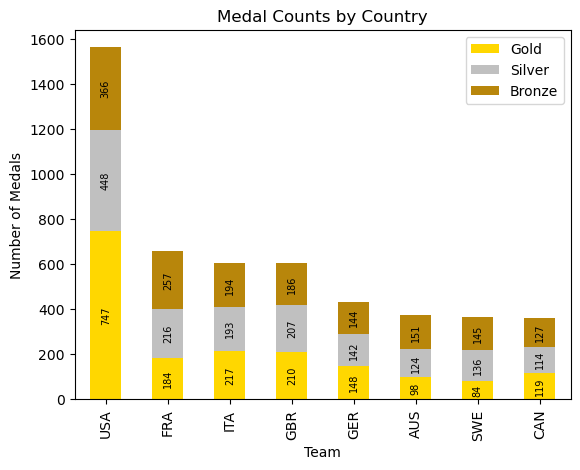

In [47]:
colors = ['gold', 'silver', 'darkgoldenrod']

ax = ten_team_with_most_medals.set_index('NOC')[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, color=colors)

ax.set_title('Medal Counts by Country')
ax.set_xlabel('Team')
ax.set_ylabel('Number of Medals')

# number of medals for each type on labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', rotation=90, fontsize=7)

plt.show()

### Visualization of 10 athlete with most medals

In the table is displayed the success percentage of the top 10 athletes who have won the most medals. The success percentage is calculated as the proportion of medals won to the total number of games participated in, without differentiating between the types of medals (gold, silver, or bronze). Interestingly, some athletes, such as Natalie Anne Coughlin and Raymond Clarence "Ray" Ewry, have achieved a 100% success rate, meaning they won a medal in every event they participated in, even though they have fewer total medals compared to other athletes in the list.

In [48]:
athlete_medal_count = olympic_df.groupby(['ID','Medal']).size().unstack(fill_value=0)
athlete_medal_count['Total'] = athlete_medal_count[['Gold', 'Silver', 'Bronze']].sum(axis=1)
athlete_medal_count = athlete_medal_count.reset_index()
athlete_medal_count = athlete_medal_count[['ID','Gold', 'Silver', 'Bronze', 'Total']]
athlete_medal_count.columns.name = None

athlete_name = olympic_df[['ID', 'Name']].drop_duplicates()
athlete_medal_count = athlete_medal_count.merge(athlete_name, on='ID')
ten_athlete_with_most_medals = athlete_medal_count.sort_values(by='Total', ascending=False).head(10)

In [49]:
ten_athlete_with_most_medals

,ID,Gold,Silver,Bronze,Total,Name
4194,4198,7,5,3,15,Nikolay Yefimovich Andrianov
11943,11951,8,4,1,13,Ole Einar Bjrndalen
23398,23426,3,4,5,12,Natalie Anne Coughlin (-Hall)
35512,35550,8,4,0,12,Birgit Fischer-Schmidt
11634,11642,8,2,1,11,"Matthew Nicholas ""Matt"" Biondi"
18815,18826,7,4,0,11,Vra slavsk (-Odloilov)
21376,21402,7,3,1,11,Viktor Ivanovych Chukarin
11935,11943,6,3,1,10,Marit Bjrgen
5694,5700,5,2,3,10,Polina Hryhorivna Astakhova
33521,33557,10,0,0,10,"Raymond Clarence ""Ray"" Ewry"


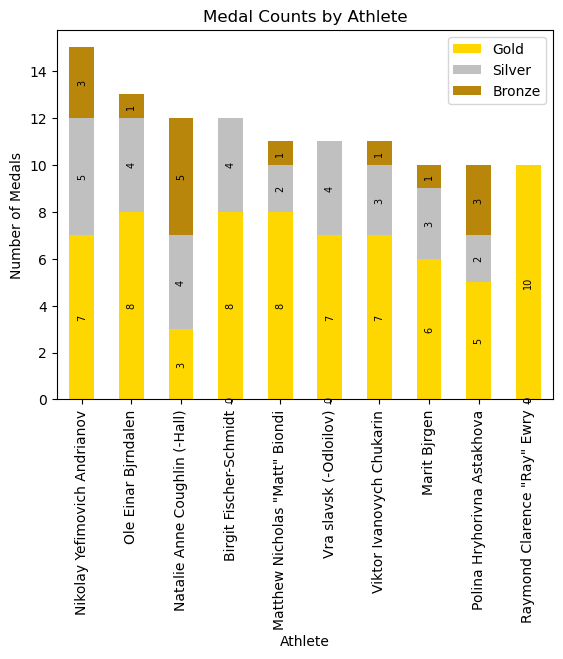

In [50]:
colors = ['gold', 'silver', 'darkgoldenrod']

ax = ten_athlete_with_most_medals.set_index('Name')[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, color=colors)

ax.set_title('Medal Counts by Athlete')
ax.set_xlabel('Athlete')
ax.set_ylabel('Number of Medals')

# number of medals for each type on labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', rotation=90, fontsize=7)

plt.show()

In [51]:

athlete_participation_count = olympic_df['Name'].value_counts()
ten_athlete_with_most_medals = ten_athlete_with_most_medals.merge(athlete_participation_count ,on='Name')

ten_athlete_with_most_medals.rename(columns={'count':'Total Participation'}, inplace=True)

ten_athlete_with_most_medals['athlete_success_percentage'] = (ten_athlete_with_most_medals['Total']/ten_athlete_with_most_medals['Total Participation'])*100
ten_athlete_with_most_medals



,ID,Gold,Silver,Bronze,Total,Name,Total Participation,athlete_success_percentage
0,4198,7,5,3,15,Nikolay Yefimovich Andrianov,24,62.50
1,11951,8,4,1,13,Ole Einar Bjrndalen,27,48.15
2,23426,3,4,5,12,Natalie Anne Coughlin (-Hall),12,100.00
3,35550,8,4,0,12,Birgit Fischer-Schmidt,13,92.31
4,11642,8,2,1,11,"Matthew Nicholas ""Matt"" Biondi",12,91.67
5,18826,7,4,0,11,Vra slavsk (-Odloilov),18,61.11
6,21402,7,3,1,11,Viktor Ivanovych Chukarin,16,68.75
7,11943,6,3,1,10,Marit Bjrgen,19,52.63
8,5700,5,2,3,10,Polina Hryhorivna Astakhova,19,52.63
9,33557,10,0,0,10,"Raymond Clarence ""Ray"" Ewry",10,100.00


### 10 SPORTS WITH MOST PARTCIPANT NUMBER AND WHICH COUNTRY IS GOOD IN WHICH SPORT

In [52]:
sport_athlete_count = olympic_df.groupby('Sport')['ID'].nunique().sort_values(ascending=False).head(10)
sport_athlete_count = sport_athlete_count.reset_index()
sport_athlete_count = sport_athlete_count.rename(columns={'ID' : 'Total Participation'})
print(sport_athlete_count)

       Sport  Total Participation
0  Athletics                 6040
1   Swimming                 2267
2     Rowing                 1961
3   Football                 1800
4    Cycling                 1520
5     Boxing                 1456
6   Shooting                 1330
7  Wrestling                 1293
8    Sailing                 1291
9    Fencing                 1214


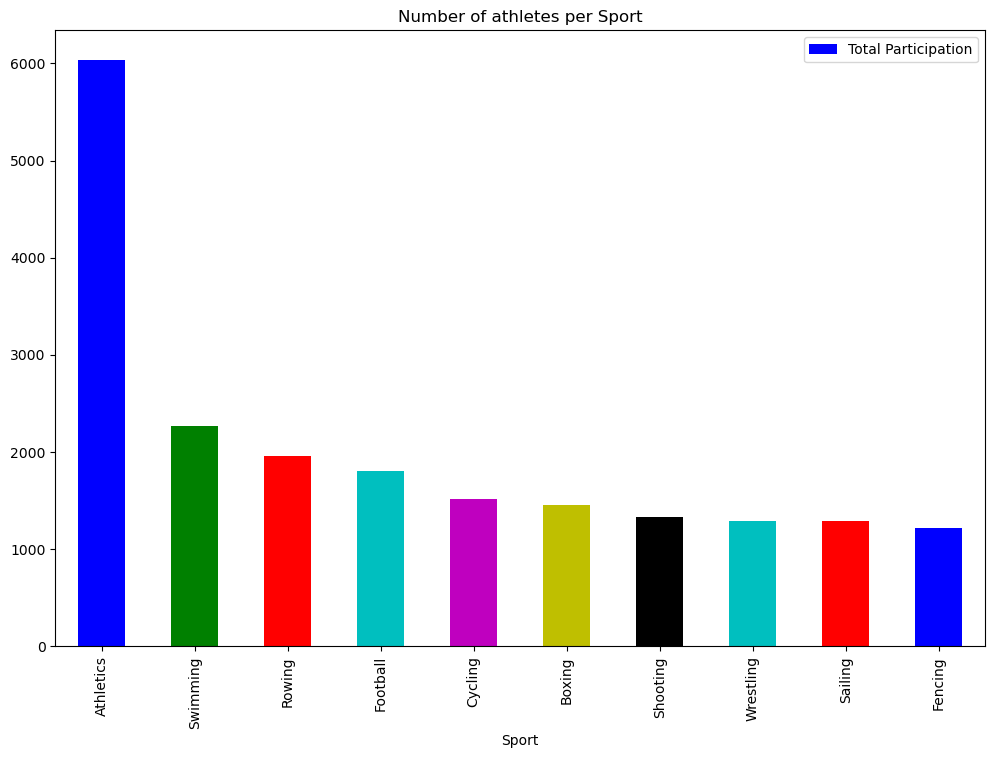

In [53]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'c', 'r', 'b']
sport_athlete_count.plot(kind='bar', x='Sport', y='Total Participation', figsize=(12,8), title='Number of athletes per Sport', color=colors[:len(sport_athlete_count)])
plt.xticks(rotation = 90)
plt.show()

In [54]:
df_olympic_with_ten_sports = sport_athlete_count.merge(olympic_df, on='Sport')

In [55]:
df_olympic_with_ten_sports['Sport'].unique()

array(['Athletics', 'Swimming', 'Rowing', 'Football', 'Cycling', 'Boxing',
       'Shooting', 'Wrestling', 'Sailing', 'Fencing'], dtype=object)

### Winter Games dataframe and Summer Games dataframe

In [56]:
winter_df = olympic_df[olympic_df['Season'] == 'Winter']
summer_df = olympic_df[olympic_df['Season'] == 'Summer']

### CORRELATION MATRIX

**NUMERICAL ENCODING**

COLUMNS CAN BE TRANSFORM:
- SEX: M/F -> 0/1

In [57]:
replace_sex={
    'M':0,
    "F":1
}
olympic_df['Sex'] = olympic_df['Sex'].replace(replace_sex)


pd.set_option("future.no_silent_downcasting", True)

**Prepare data for model and correlation.**

Use dummies for medal column to use it for machine learning model.

Convert object columns into numerical columns. 

In [58]:
olympic_df = pd.get_dummies(olympic_df, columns=['Medal'], dtype=int)  #, dummy_na=True

In [59]:
label_encoder = LabelEncoder()
for column in ['Games', 'Season', 'Sport']:
    olympic_df[column] = label_encoder.fit_transform(olympic_df[column])

<AxesSubplot:>

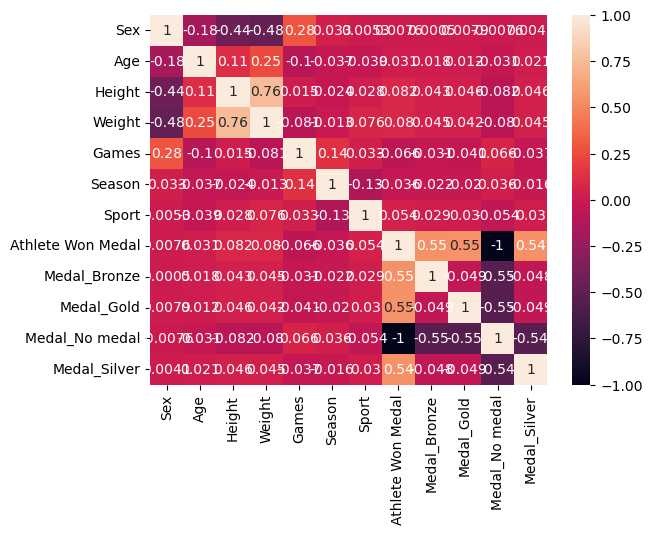

In [60]:
corr_df = olympic_df.drop(columns=['ID', 'Year']).select_dtypes(include=['number'])
# corr_df.corr()
sns.heatmap(corr_df.corr(), annot=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1300x1700 with 0 Axes>

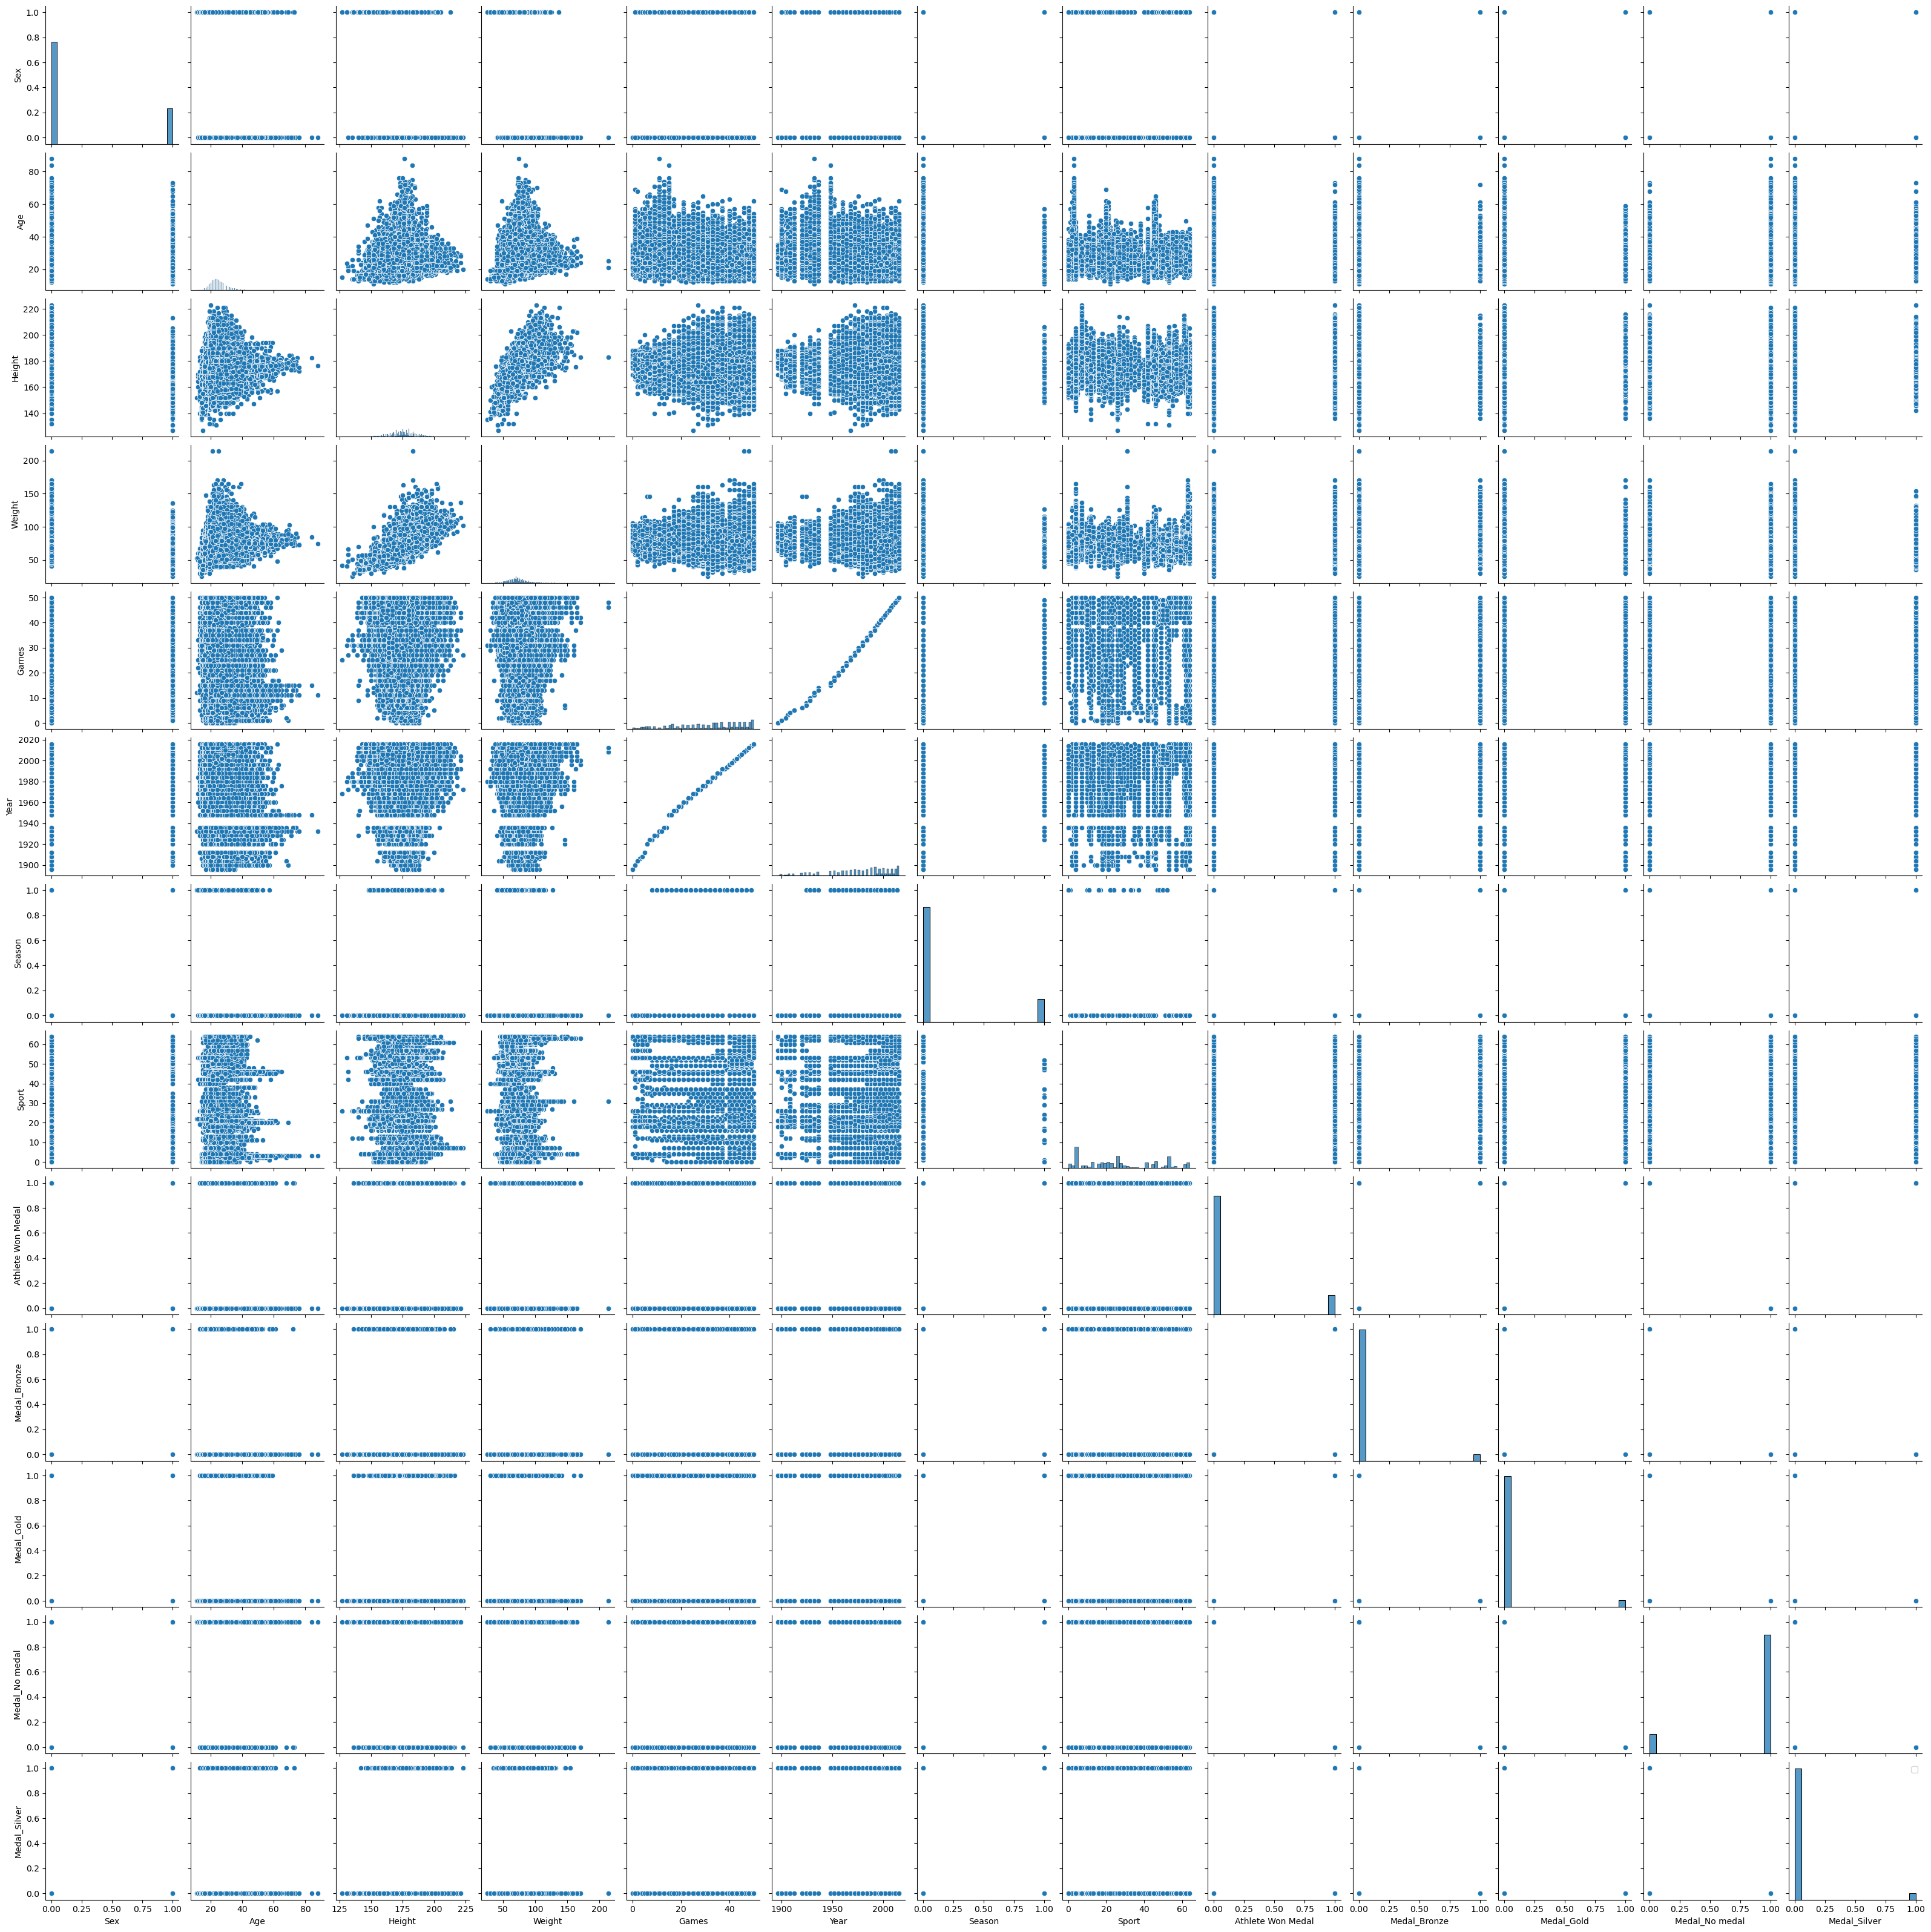

In [61]:
plt.figure(figsize=(13,17))
sns.pairplot(data=olympic_df.drop(columns='ID'))
plt.legend()
plt.show()

# MODEL 

define target columns

In [62]:
target_columns = ['Athlete Won Medal']

Scale the dataframe

In [63]:
numerical_cols = [col for col in olympic_df.select_dtypes(include=['float64', 'int64']).columns if col not in target_columns]

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
olympic_df[numerical_cols] = scaler.fit_transform(olympic_df[numerical_cols])

# Check the normalized features
print(olympic_df.head())

    ID                      Name  Sex  Age  Height  Weight            Team  \
0 0.00                 A Dijiang 0.00 0.17    0.55    0.29           China   
1 0.00                  A Lamusi 0.00 0.16    0.45    0.19           China   
2 0.00       Gunnar Nielsen Aaby 0.00 0.17    0.53    0.27         Denmark   
3 0.00      Edgar Lindenau Aabye 0.00 0.30    0.54    0.36  Denmark/Sweden   
4 0.00  Christine Jacoba Aaftink 1.00 0.13    0.60    0.30     Netherlands   

   NOC  Games  Year  Season       City  Sport  \
0  CHN   0.74  0.80    0.00  Barcelona   0.11   
1  CHN   0.96  0.97    0.00     London   0.48   
2  DEN   0.12  0.20    0.00  Antwerpen   0.36   
3  DEN   0.02  0.03    0.00      Paris   0.94   
4  NED   0.72  0.77    1.00    Calgary   0.81   

                              Event          reg  Athlete Won Medal  \
0       Basketball Men's Basketball        China                  0   
1      Judo Men's Extra-Lightweight        China                  0   
2           Football Me

## Model Building

### Will an athlete win a medal ?

We have to drop medal columns (we will predict) and name column (because  we cannot encode it)

In [64]:
olympic_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'reg', 'Athlete Won Medal',
       'Medal_Bronze', 'Medal_Gold', 'Medal_No medal', 'Medal_Silver'],
      dtype='object')

In [65]:
# X = features, y = target
X = olympic_df.drop(['Name','Athlete Won Medal', 'Medal_Bronze', 'Medal_Gold', 'Medal_Silver', 'Medal_No medal', 'Team', 'NOC', 'reg', 'City', 'Event'], axis=1)
y = olympic_df['Athlete Won Medal']

In [66]:
def make_prediction(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    actual_predicted_values = pd.DataFrame(dict(actual=y_test, prediction=predictions))
    precision = metrics.precision_score(y_test, predictions)
    print(classification_report(y_test, predictions))
    

    return actual_predicted_values, accuracy, precision 

In [67]:
model = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)
make_prediction(X, y, model)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     11964
           1       0.70      0.15      0.25      1947

    accuracy                           0.87     13911
   macro avg       0.79      0.57      0.59     13911
weighted avg       0.85      0.87      0.83     13911



(       actual  prediction
 6712        0           0
 13635       0           0
 3537        0           0
 56545       1           0
 4010        0           0
 ...       ...         ...
 31638       0           0
 9526        0           0
 15277       0           0
 25772       0           0
 8254        0           0
 
 [13911 rows x 2 columns],
 0.8721155919775717,
 0.6981132075471698)

In [68]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=10, random_state=1, max_depth=250, class_weight='balanced')
make_prediction(X, y, model)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11964
           1       0.49      0.34      0.40      1947

    accuracy                           0.86     13911
   macro avg       0.69      0.64      0.66     13911
weighted avg       0.84      0.86      0.85     13911



(       actual  prediction
 6712        0           0
 13635       0           0
 3537        0           0
 56545       1           0
 4010        0           0
 ...       ...         ...
 31638       0           0
 9526        0           0
 15277       0           0
 25772       0           0
 8254        0           0
 
 [13911 rows x 2 columns],
 0.857379052548343,
 0.4864864864864865)

In [69]:

model = LogisticRegression()
make_prediction(X, y, model)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     11964
           1       0.00      0.00      0.00      1947

    accuracy                           0.86     13911
   macro avg       0.43      0.50      0.46     13911
weighted avg       0.74      0.86      0.80     13911



(       actual  prediction
 6712        0           0
 13635       0           0
 3537        0           0
 56545       1           0
 4010        0           0
 ...       ...         ...
 31638       0           0
 9526        0           0
 15277       0           0
 25772       0           0
 8254        0           0
 
 [13911 rows x 2 columns],
 0.8600388182014234,
 0.0)

In [70]:
model=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
make_prediction(X, y, model)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     11964
           1       0.64      0.11      0.19      1947

    accuracy                           0.87     13911
   macro avg       0.76      0.55      0.56     13911
weighted avg       0.84      0.87      0.82     13911



(       actual  prediction
 6712        0           0
 13635       0           0
 3537        0           0
 56545       1           0
 4010        0           0
 ...       ...         ...
 31638       0           0
 9526        0           0
 15277       0           0
 25772       0           0
 8254        0           0
 
 [13911 rows x 2 columns],
 0.8669398317877939,
 0.6411764705882353)

# CONCLUSION

The Random Forest classifier achieved an overall accuracy of 86.79% and a precision of 66.67%. 
However, there is a significant class imbalance, with the model performing much better for class 0 (majority class) than for class 1 (minority class). 
Class 0 has a high recall of 99% and an F1-score of 0.93, while class 1 has a very low recall of 11% and an F1-score of 0.19. 
This indicates that the model struggles to detect instances of class 1, largely due to the disproportionate amount of data in favor of the non-medal class (class 0). 
As a result, the model tends to predict the majority of new data as class 0.

We obtained similar results with each classification method used, highlighting the persistent issue of class imbalance. 
We can conclude that the current dataset is not suitable for making reliable predictions using classification methods without first addressing the class imbalance.